Waste Management using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = "TRAIN"
test_path = "TEST"

In [5]:
# Importing Libraries
from tensorflow.keras.models import  Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [01:07<00:00, 147.45it/s]


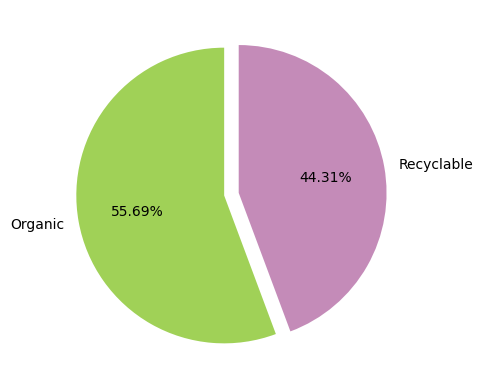

In [7]:
colors = ['#a0d157','#c48bb8']
plt.pie (data.label.value_counts(), labels=['Organic','Recyclable'],autopct='%0.2f%%', colors = colors, startangle = 90, explode=[0.05, 0.05])
plt.show()

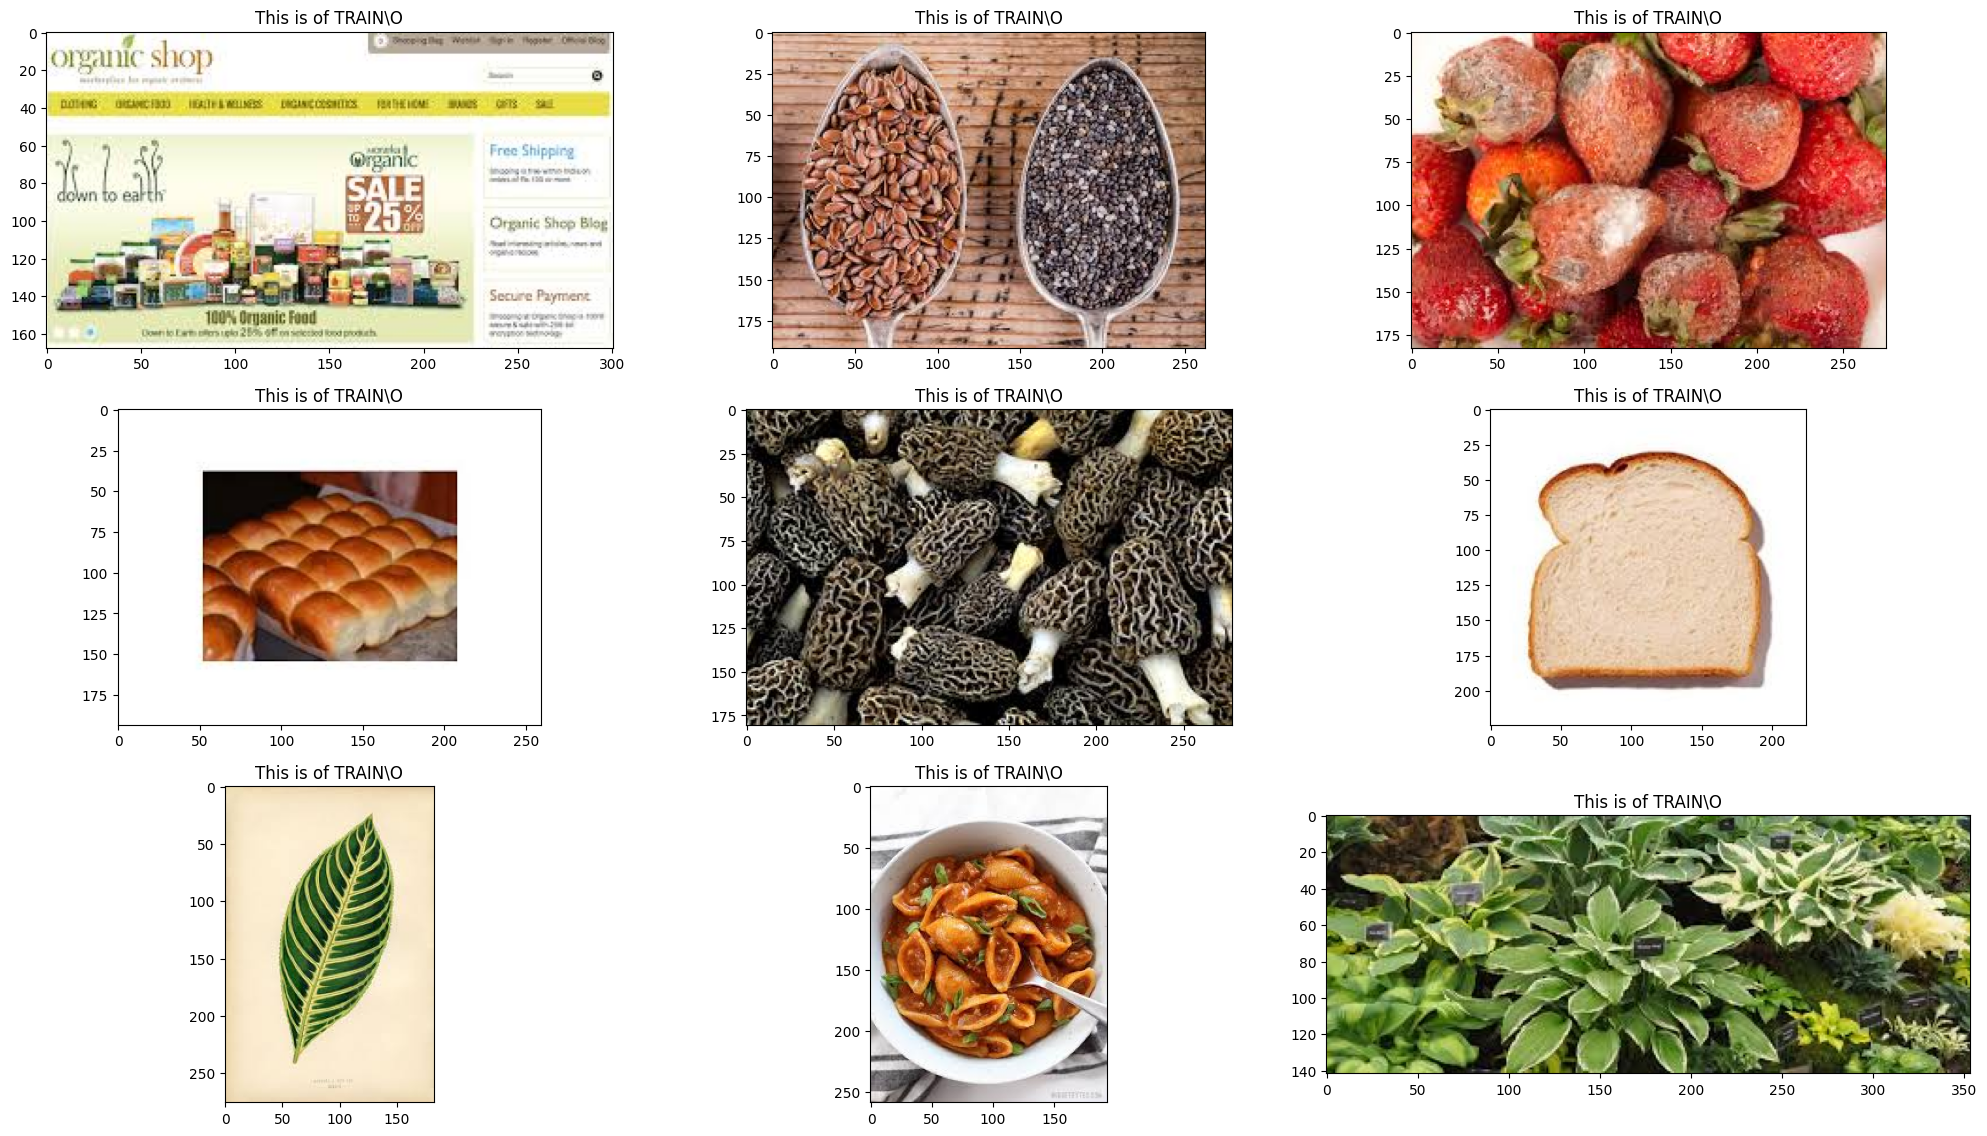

In [8]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index =np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN Convolutional Neural Network

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batchsize = 256

In [10]:
model.summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size=(224, 224),
  batch_size = 256,
  color_mode = "rgb",
  class_mode = "categorical")

test_generator = train_datagen.flow_from_directory(
  test_path,
  target_size=(224, 224),
  batch_size = 256,
  color_mode = "rgb",
  class_mode = "categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 439s 5s/step - accuracy: 0.7360 - loss: 0.5721 - val_accuracy: 0.8496 - val_loss: 0.3511
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 379s 4s/step - accuracy: 0.8284 - loss: 0.4204 - val_accuracy: 0.8854 - val_loss: 0.2993
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 369s 4s/step - accuracy: 0.8474 - loss: 0.3770 - val_accuracy: 0.8898 - val_loss: 0.2836
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.8693 - loss: 0.3275 - val_accuracy: 0.8647 - val_loss: 0.3121
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.8757 - loss: 0.3050 - val_accuracy: 0.8743 - val_loss: 0.3066
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 485s 5s/step - accuracy: 0.8893 - loss: 0.2787 - val_accuracy: 0.8993 - val_loss: 0.2643
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 531s 6s/step - accuracy: 0.9056 - loss: 0.2391 - val_accuracy: 0.8448 - val_loss: 0.4126
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 457s 5s/step - accuracy: 0.9039 - loss: 0.2457 - val_accuracy: 0.8906 - v